In [226]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import OneHotEncoder

In [309]:
df_enso = pd.read_csv('../raw_data/Agrupado_por_trimestre.csv')
df_enso

,season,Trimestre,indice,PE,PromProd,SumProd
0,2001-2002,AMJ,0.4,NaN,0.013666,0.2050
1,2001-2002,DJF,-0.1,NaN,0.044450,0.0889
2,2001-2002,FMA,0.1,NaN,0.028633,0.2577
3,2001-2002,JFM,0.0,NaN,0.033850,0.2031
4,2001-2002,MAM,0.2,NaN,0.021654,0.2382
...,...,...,...,...,...,...
236,2021-2022,JAS,-0.5,ML,0.016458,0.1975
237,2021-2022,JJA,-0.4,ML,0.011583,0.1390
238,2021-2022,NDJ,-1.0,ML,0.042737,0.3419
239,2021-2022,OND,-1.0,ML,0.041718,0.4589


In [315]:
df_enso = df_enso.drop(df_enso[df_enso['season']=='2001-2002 '].index)
df_enso = df_enso.drop(df_enso[df_enso['season']=='2021-2022 '].index)
df_enso

,season,Trimestre,indice,PE,PromProd,SumProd
6,2002-2003,AMJ,-0.3,ME,0.015113,0.2267
7,2002-2003,ASO,1.0,ME,0.027954,0.3075
8,2002-2003,DJF,0.9,ME,0.037975,0.4557
9,2002-2003,FMA,0.4,ME,0.035309,0.3884
10,2002-2003,JAS,0.9,ME,0.015100,0.2416
...,...,...,...,...,...,...
229,2020-2021,MAM,-0.7,ML,0.032136,0.3535
230,2020-2021,MJJ,-0.4,ML,0.012766,0.1532
231,2020-2021,NDJ,-1.3,ML,0.043409,0.4775
232,2020-2021,OND,-1.3,ML,0.047145,0.5186


In [316]:
data = {'Trimestre':['JJA','JAS','ASO','SON','OND','NDJ','DJF','JFM','FMA','MAM','AMJ','MJJ'],
       'Secuencia':['1','2','3','4','5','6','7','8','9','10','11','12']}

df_enso['Secuencia'] = df_enso['Trimestre']
df_enso['Secuencia'] = df_enso['Secuencia'].replace('JJA',1)
df_enso['Secuencia'] = df_enso['Secuencia'].replace('JAS',2)
df_enso['Secuencia'] = df_enso['Secuencia'].replace('ASO',3)
df_enso['Secuencia'] = df_enso['Secuencia'].replace('SON',4)
df_enso['Secuencia'] = df_enso['Secuencia'].replace('OND',5)
df_enso['Secuencia'] = df_enso['Secuencia'].replace('NDJ',6)
df_enso['Secuencia'] = df_enso['Secuencia'].replace('DJF',7)
df_enso['Secuencia'] = df_enso['Secuencia'].replace('JFM',8)
df_enso['Secuencia'] = df_enso['Secuencia'].replace('FMA',9)
df_enso['Secuencia'] = df_enso['Secuencia'].replace('MAM',10)
df_enso['Secuencia'] = df_enso['Secuencia'].replace('AMJ',11)
df_enso['Secuencia'] = df_enso['Secuencia'].replace('MJJ',12)
df_enso

,season,Trimestre,indice,PE,PromProd,SumProd,Secuencia
6,2002-2003,AMJ,-0.3,ME,0.015113,0.2267,11
7,2002-2003,ASO,1.0,ME,0.027954,0.3075,3
8,2002-2003,DJF,0.9,ME,0.037975,0.4557,7
9,2002-2003,FMA,0.4,ME,0.035309,0.3884,9
10,2002-2003,JAS,0.9,ME,0.015100,0.2416,2
...,...,...,...,...,...,...,...
229,2020-2021,MAM,-0.7,ML,0.032136,0.3535,10
230,2020-2021,MJJ,-0.4,ML,0.012766,0.1532,12
231,2020-2021,NDJ,-1.3,ML,0.043409,0.4775,6
232,2020-2021,OND,-1.3,ML,0.047145,0.5186,5


In [317]:
#df_enso['season'].str[0:4]
#df_enso['date'] = df_enso['season'].str[-5:].replace(' ','') + '-' + 
df_enso['year'] = 1999
df_enso['year'] = np.where(df_enso['Trimestre']=='JJA', df_enso['season'].str[0:4], df_enso['year'])
df_enso['year'] = np.where(df_enso['Trimestre']=='JAS', df_enso['season'].str[0:4], df_enso['year'])
df_enso['year'] = np.where(df_enso['Trimestre']=='ASO', df_enso['season'].str[0:4], df_enso['year'])
df_enso['year'] = np.where(df_enso['Trimestre']=='SON', df_enso['season'].str[0:4], df_enso['year'])
df_enso['year'] = np.where(df_enso['Trimestre']=='OND', df_enso['season'].str[0:4], df_enso['year'])
df_enso['year'] = np.where(df_enso['Trimestre']=='NDJ', df_enso['season'].str[0:4], df_enso['year'])
df_enso['year'] = np.where(df_enso['Trimestre']=='DJF', df_enso['season'].str[-5:].replace(' ','') , df_enso['year'])
df_enso['year'] = np.where(df_enso['Trimestre']=='JFM', df_enso['season'].str[-5:].replace(' ','') , df_enso['year'])
df_enso['year'] = np.where(df_enso['Trimestre']=='FMA', df_enso['season'].str[-5:].replace(' ','') , df_enso['year'])
df_enso['year'] = np.where(df_enso['Trimestre']=='MAM', df_enso['season'].str[-5:].replace(' ','') , df_enso['year'])
df_enso['year'] = np.where(df_enso['Trimestre']=='AMJ', df_enso['season'].str[-5:].replace(' ','') , df_enso['year'])
df_enso['year'] = np.where(df_enso['Trimestre']=='MJJ', df_enso['season'].str[-5:].replace(' ','') , df_enso['year'])
df_enso['year'] = df_enso['year'].str.strip() 
df_enso


,season,Trimestre,indice,PE,PromProd,SumProd,Secuencia,year
6,2002-2003,AMJ,-0.3,ME,0.015113,0.2267,11,2003
7,2002-2003,ASO,1.0,ME,0.027954,0.3075,3,2002
8,2002-2003,DJF,0.9,ME,0.037975,0.4557,7,2003
9,2002-2003,FMA,0.4,ME,0.035309,0.3884,9,2003
10,2002-2003,JAS,0.9,ME,0.015100,0.2416,2,2002
...,...,...,...,...,...,...,...,...
229,2020-2021,MAM,-0.7,ML,0.032136,0.3535,10,2021
230,2020-2021,MJJ,-0.4,ML,0.012766,0.1532,12,2021
231,2020-2021,NDJ,-1.3,ML,0.043409,0.4775,6,2020
232,2020-2021,OND,-1.3,ML,0.047145,0.5186,5,2020


In [318]:

df_enso['date'] = ''
df_enso['date'] = np.where(df_enso['Trimestre']=='JJA', df_enso['year'].str.strip() + '-' + '6' + '-1', df_enso['date'])
df_enso['date'] = np.where(df_enso['Trimestre']=='JAS', df_enso['year'].str.strip() + '-' + '7' + '-1', df_enso['date'])
df_enso['date'] = np.where(df_enso['Trimestre']=='ASO', df_enso['year'].str.strip()  + '-' + '8' + '-1', df_enso['date'])
df_enso['date'] = np.where(df_enso['Trimestre']=='SON', df_enso['year'].str.strip()  + '-' + '9' + '-1', df_enso['date'])
df_enso['date'] = np.where(df_enso['Trimestre']=='OND', df_enso['year'].str.strip()  + '-' + '10' + '-1', df_enso['date'])
df_enso['date'] = np.where(df_enso['Trimestre']=='NDJ', df_enso['year'].str.strip()  + '-' + '11' + '-1', df_enso['date'])
df_enso['date'] = np.where(df_enso['Trimestre']=='DJF', df_enso['year'].str.strip()  + '-' + '12' + '-1', df_enso['date'])
df_enso['date'] = np.where(df_enso['Trimestre']=='JFM', df_enso['year'] + '-' + '1' + '-1', df_enso['date'])
df_enso['date'] = np.where(df_enso['Trimestre']=='FMA', df_enso['year'] + '-' + '2' + '-1', df_enso['date'])
df_enso['date'] = np.where(df_enso['Trimestre']=='MAM', df_enso['year'] + '-' + '3' + '-1', df_enso['date'])
df_enso['date'] = np.where(df_enso['Trimestre']=='AMJ', df_enso['year'] + '-' + '4' + '-1', df_enso['date'])
df_enso['date'] = np.where(df_enso['Trimestre']=='MJJ', df_enso['year'] + '-' + '5' + '-1', df_enso['date'])

df_enso['date'] = df_enso['date'].replace(' ','')
df_enso['date'] = pd.to_datetime(df_enso['date'])
df_enso

,season,Trimestre,indice,PE,PromProd,SumProd,Secuencia,year,date
6,2002-2003,AMJ,-0.3,ME,0.015113,0.2267,11,2003,2003-04-01
7,2002-2003,ASO,1.0,ME,0.027954,0.3075,3,2002,2002-08-01
8,2002-2003,DJF,0.9,ME,0.037975,0.4557,7,2003,2003-12-01
9,2002-2003,FMA,0.4,ME,0.035309,0.3884,9,2003,2003-02-01
10,2002-2003,JAS,0.9,ME,0.015100,0.2416,2,2002,2002-07-01
...,...,...,...,...,...,...,...,...,...
229,2020-2021,MAM,-0.7,ML,0.032136,0.3535,10,2021,2021-03-01
230,2020-2021,MJJ,-0.4,ML,0.012766,0.1532,12,2021,2021-05-01
231,2020-2021,NDJ,-1.3,ML,0.043409,0.4775,6,2020,2020-11-01
232,2020-2021,OND,-1.3,ML,0.047145,0.5186,5,2020,2020-10-01


In [359]:

df_enso=df_enso.set_index('date').asfreq('D')


In [360]:
df_enso['PE'] = df_enso['PE'].replace(np.nan,'NN')
df_enso

,season,Trimestre,indice,PE,PromProd,SumProd,Secuencia,year,NN,ME,WE,WL,SL,ML,VSE
date,,,,,,,,,,,,,,,
2002-06-01,2002-2003,JJA,0.8,ME,0.010295,0.2059,1.0,2002,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2002-06-02,NaN,NaN,NaN,NN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-06-03,NaN,NaN,NaN,NN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-06-04,NaN,NaN,NaN,NN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-06-05,NaN,NaN,NaN,NN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-27,NaN,NaN,NaN,NN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-28,NaN,NaN,NaN,NN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-29,NaN,NaN,NaN,NN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='indice', ylabel='SumProd'>

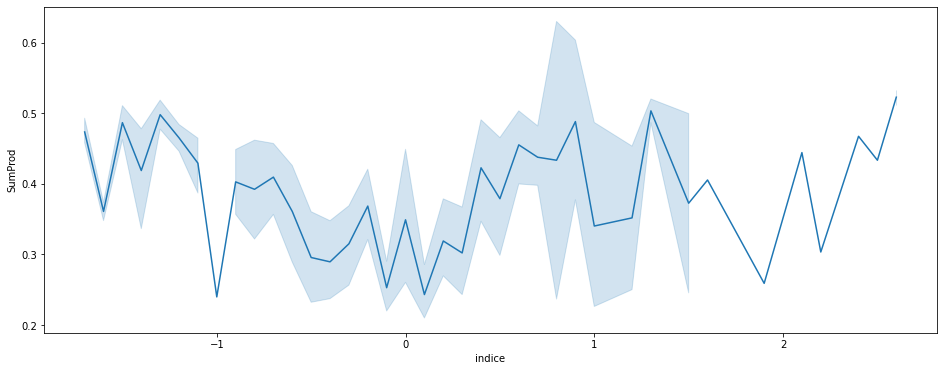

In [321]:
plt.figure(figsize=(16,6))
sns.lineplot(data=df_enso, x="indice", y="SumProd")

<AxesSubplot:xlabel='PE', ylabel='SumProd'>

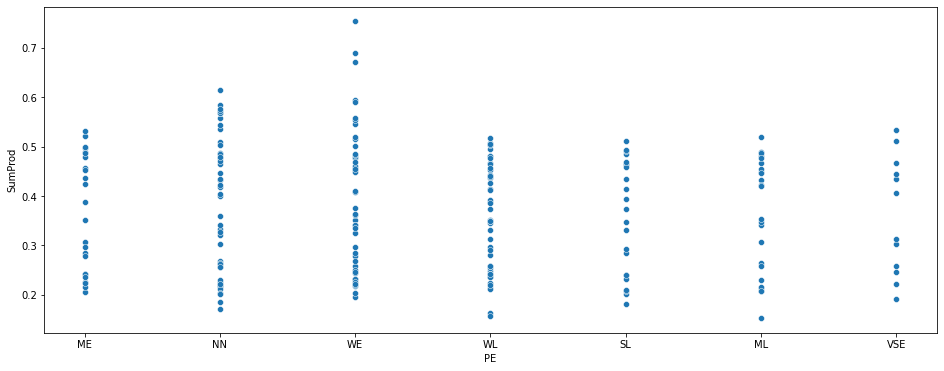

In [322]:
plt.figure(figsize=(16,6))
sns.scatterplot(data=df_enso, x="PE", y="SumProd")

In [323]:
df_enso[df_enso.season.eq('2002-2003 ')]

,season,Trimestre,indice,PE,PromProd,SumProd,Secuencia,year,date
6,2002-2003,AMJ,-0.3,ME,0.015113,0.2267,11,2003,2003-04-01
7,2002-2003,ASO,1.0,ME,0.027954,0.3075,3,2002,2002-08-01
8,2002-2003,DJF,0.9,ME,0.037975,0.4557,7,2003,2003-12-01
9,2002-2003,FMA,0.4,ME,0.035309,0.3884,9,2003,2003-02-01
10,2002-2003,JAS,0.9,ME,0.015100,0.2416,2,2002,2002-07-01
11,2002-2003,JFM,0.6,ME,0.036325,0.4359,8,2003,2003-01-01
12,2002-2003,JJA,0.8,ME,0.010295,0.2059,1,2002,2002-06-01
13,2002-2003,MAM,0.0,ME,0.025963,0.2856,10,2003,2003-03-01
14,2002-2003,MJJ,-0.2,ME,0.010750,0.2150,12,2003,2003-05-01
15,2002-2003,NDJ,1.3,ME,0.040833,0.4900,6,2002,2002-11-01


<AxesSubplot:xlabel='PE', ylabel='SumProd'>

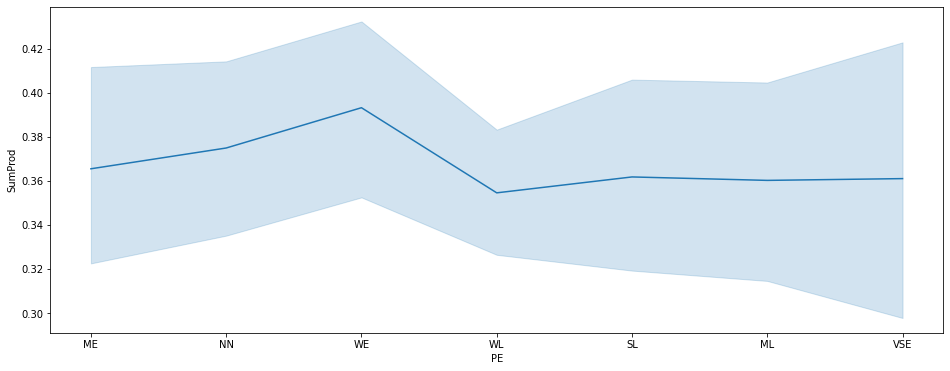

In [324]:
plt.figure(figsize=(16,6))
sns.lineplot(data=df_enso, x="PE", y="SumProd")

In [325]:
df_enso.PE.unique()

array(['ME', 'NN', 'WE', 'WL', 'SL', 'ML', 'VSE'], dtype=object)

In [326]:
ohe = OneHotEncoder(sparse = False)
ohe.fit(df_enso[['PE']])
PE_encoded = ohe.transform(df_enso[['PE']])
df_enso["NN"],df_enso["ME"],df_enso['WE'],df_enso["WL"],df_enso["SL"],df_enso['ML'],df_enso['VSE'] = PE_encoded.T

In [327]:
df_enso

,season,Trimestre,indice,PE,PromProd,SumProd,Secuencia,year,date,NN,ME,WE,WL,SL,ML,VSE
6,2002-2003,AMJ,-0.3,ME,0.015113,0.2267,11,2003,2003-04-01,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2002-2003,ASO,1.0,ME,0.027954,0.3075,3,2002,2002-08-01,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2002-2003,DJF,0.9,ME,0.037975,0.4557,7,2003,2003-12-01,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2002-2003,FMA,0.4,ME,0.035309,0.3884,9,2003,2003-02-01,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10,2002-2003,JAS,0.9,ME,0.015100,0.2416,2,2002,2002-07-01,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,2020-2021,MAM,-0.7,ML,0.032136,0.3535,10,2021,2021-03-01,0.0,1.0,0.0,0.0,0.0,0.0,0.0
230,2020-2021,MJJ,-0.4,ML,0.012766,0.1532,12,2021,2021-05-01,0.0,1.0,0.0,0.0,0.0,0.0,0.0
231,2020-2021,NDJ,-1.3,ML,0.043409,0.4775,6,2020,2020-11-01,0.0,1.0,0.0,0.0,0.0,0.0,0.0
232,2020-2021,OND,-1.3,ML,0.047145,0.5186,5,2020,2020-10-01,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [328]:
df = df_enso[['date','SumProd']]
df = df.set_index('date').asfreq('MS', how='start')
df=df.dropna()
df

,SumProd
date,
2002-06-01,0.2059
2002-07-01,0.2416
2002-08-01,0.3075
2002-09-01,0.4535
2002-10-01,0.4965
...,...
2021-02-01,0.4541
2021-03-01,0.3535
2021-04-01,0.2300


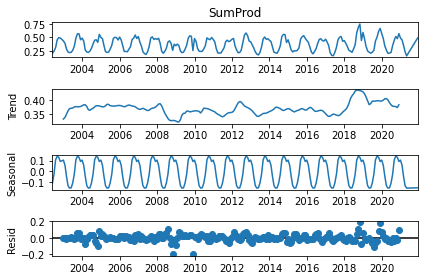

In [329]:
result_add = seasonal_decompose(df['SumProd'], model='ad',period=12)
result_add.plot();

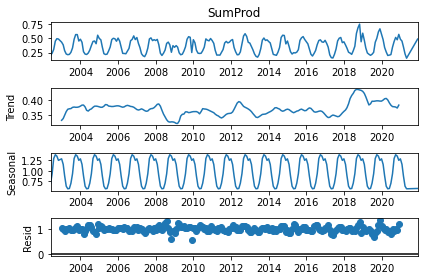

In [330]:
# Multiplicative Decomposition (y = Trend * Seasonal * Residuals)
result_mul = seasonal_decompose(df['SumProd'], model='multiplicative',period=12)
result_mul.plot();

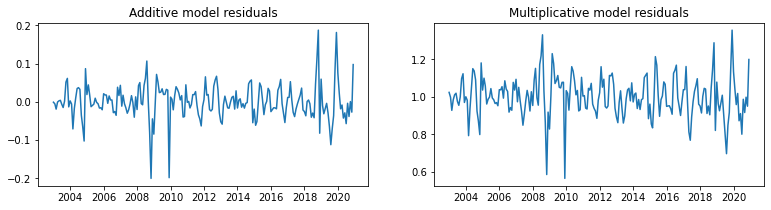

In [331]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(13,3))
ax1.plot(result_add.resid); ax1.set_title("Additive model residuals")
ax2.plot(result_mul.resid); ax2.set_title("Multiplicative model residuals");

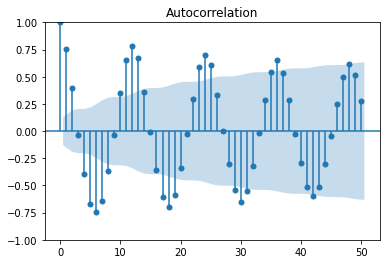

In [332]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df.SumProd, lags=50)
plt.show()

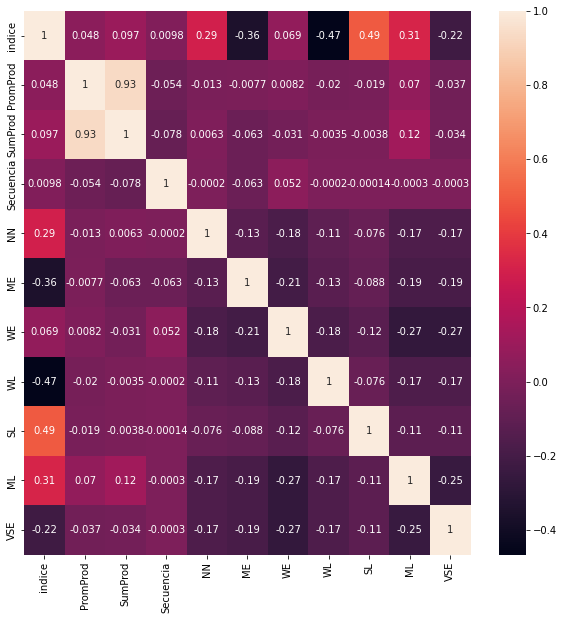

In [190]:
plt.figure(figsize=(10,10))
corrMatrix = df_enso.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

<AxesSubplot:xlabel='year', ylabel='SumProd'>

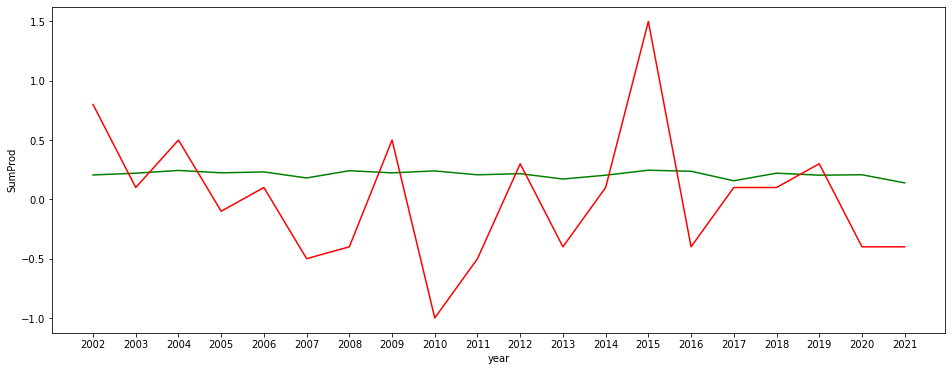

In [208]:
plt.figure(figsize=(16,6))
sns.lineplot(data=df_enso[df_enso.Trimestre.eq('JJA')], x="year", y="SumProd",color="green")
sns.lineplot(data=df_enso[df_enso.Trimestre.eq('JAS')], x="year", y="indice",color="red")

<AxesSubplot:xlabel='year', ylabel='SumProd'>

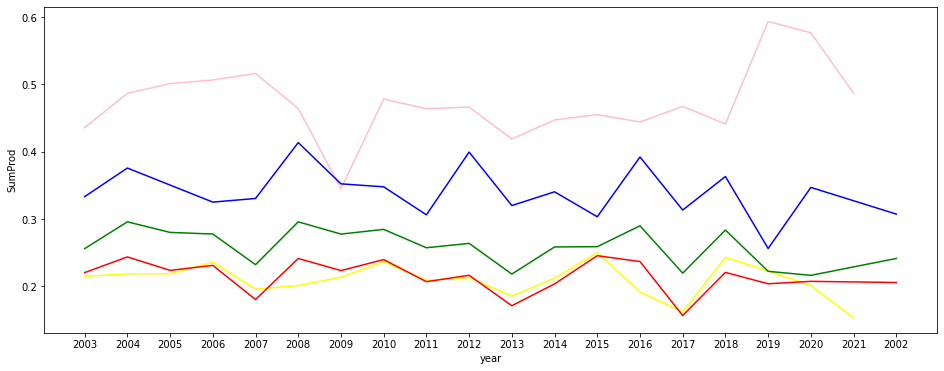

In [341]:
plt.figure(figsize=(16,6))
sns.lineplot(data=df_enso[df_enso.Trimestre.eq('JFM')], x="year", y="SumProd",color="pink")
sns.lineplot(data=df_enso[df_enso.Trimestre.eq('MJJ')], x="year", y="SumProd",color="yellow")
sns.lineplot(data=df_enso[df_enso.Trimestre.eq('JJA')], x="year", y="SumProd",color="red")
sns.lineplot(data=df_enso[df_enso.Trimestre.eq('JAS')], x="year", y="SumProd",color="green")
sns.lineplot(data=df_enso[df_enso.Trimestre.eq('ASO')], x="year", y="SumProd",color="BLUE")
#sns.lineplot(data=df_enso[df_enso.Trimestre.eq('JAS')], x="year", y="indice",color="red")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


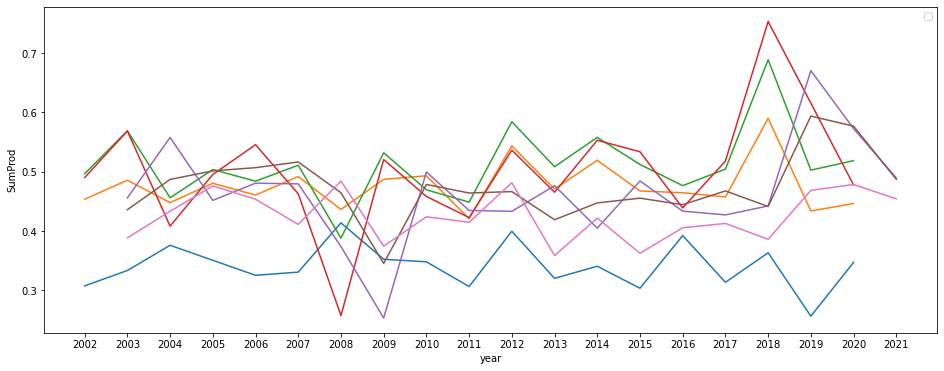

In [337]:
plt.figure(figsize=(16,6))
sns.lineplot(data=df_enso[df_enso.Trimestre.eq('ASO')], x="year", y="SumProd")
sns.lineplot(data=df_enso[df_enso.Trimestre.eq('SON')], x="year", y="SumProd")
sns.lineplot(data=df_enso[df_enso.Trimestre.eq('OND')], x="year", y="SumProd")
sns.lineplot(data=df_enso[df_enso.Trimestre.eq('NDJ')], x="year", y="SumProd")
sns.lineplot(data=df_enso[df_enso.Trimestre.eq('DJF')], x="year", y="SumProd")
sns.lineplot(data=df_enso[df_enso.Trimestre.eq('JFM')], x="year", y="SumProd")
sns.lineplot(data=df_enso[df_enso.Trimestre.eq('FMA')], x="year", y="SumProd")

plt.legend()

<AxesSubplot:xlabel='year', ylabel='SumProd'>

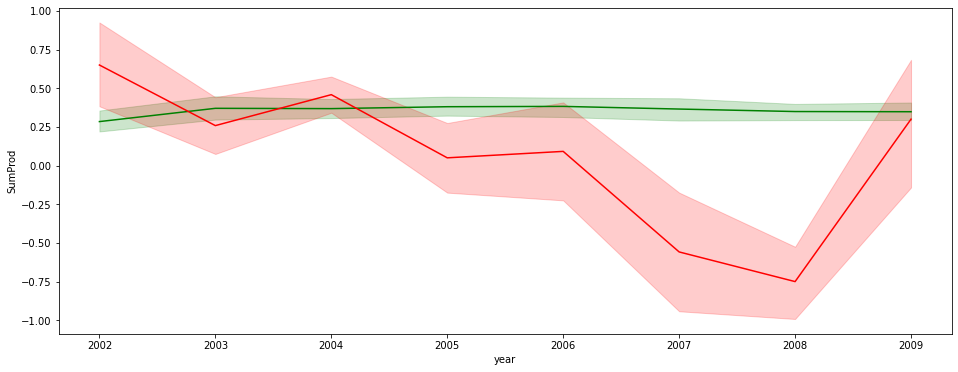

In [213]:
plt.figure(figsize=(16,6))
sns.lineplot(data=df_enso[df_enso.year.str.contains('200')], x="year", y="SumProd",color="green")
sns.lineplot(data=df_enso[df_enso.year.str.contains('200')], x="year", y="indice",color="red")

<AxesSubplot:xlabel='year', ylabel='SumProd'>

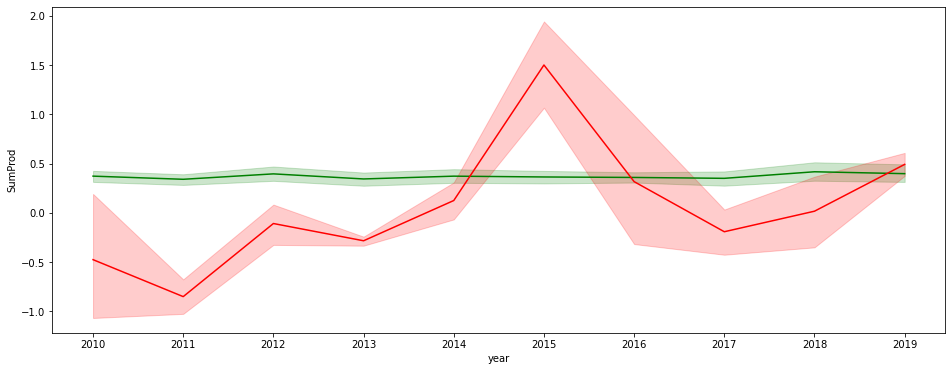

In [214]:
plt.figure(figsize=(16,6))
sns.lineplot(data=df_enso[df_enso.year.str.contains('201')], x="year", y="SumProd",color="green")
sns.lineplot(data=df_enso[df_enso.year.str.contains('201')], x="year", y="indice",color="red")

In [363]:
df_enso=df_enso.dropna()
df_enso

,season,Trimestre,indice,PE,PromProd,SumProd,Secuencia,year,NN,ME,WE,WL,SL,ML,VSE
date,,,,,,,,,,,,,,,
2002-06-01,2002-2003,JJA,0.8,ME,0.010295,0.2059,1.0,2002,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2002-07-01,2002-2003,JAS,0.9,ME,0.015100,0.2416,2.0,2002,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2002-08-01,2002-2003,ASO,1.0,ME,0.027954,0.3075,3.0,2002,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2002-09-01,2002-2003,SON,1.2,ME,0.041227,0.4535,4.0,2002,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2002-10-01,2002-2003,OND,1.3,ME,0.045136,0.4965,5.0,2002,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-01,2020-2021,FMA,-0.8,ML,0.041281,0.4541,9.0,2021,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2021-03-01,2020-2021,MAM,-0.7,ML,0.032136,0.3535,10.0,2021,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2021-04-01,2020-2021,AMJ,-0.5,ML,0.020909,0.2300,11.0,2021,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [365]:
df_mini = df_enso[['indice','PromProd','SumProd','Secuencia','year','NN','ME','WE','WL','SL','ML','VSE']]
df_mini

,indice,PromProd,SumProd,Secuencia,year,NN,ME,WE,WL,SL,ML,VSE
date,,,,,,,,,,,,
2002-06-01,0.8,0.010295,0.2059,1.0,2002,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2002-07-01,0.9,0.015100,0.2416,2.0,2002,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2002-08-01,1.0,0.027954,0.3075,3.0,2002,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2002-09-01,1.2,0.041227,0.4535,4.0,2002,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2002-10-01,1.3,0.045136,0.4965,5.0,2002,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-01,-0.8,0.041281,0.4541,9.0,2021,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2021-03-01,-0.7,0.032136,0.3535,10.0,2021,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2021-04-01,-0.5,0.020909,0.2300,11.0,2021,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [366]:
df_train = df_mini[:'2017']
df_test = df_mini['2016':]
print(df_train.shape)
print(df_test.shape)

(186, 12)
(66, 12)


In [367]:
from statsmodels.tsa.stattools import adfuller
print('p-value: ', adfuller(df_enso["SumProd"])[1])

p-value:  0.019421439217559223


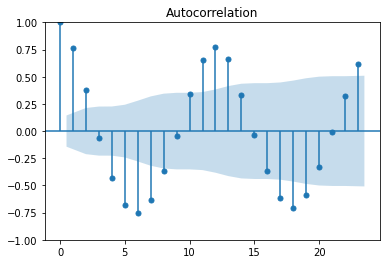

In [368]:
y = df_train.SumProd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(y);

p-value:  4.021973401712879e-06


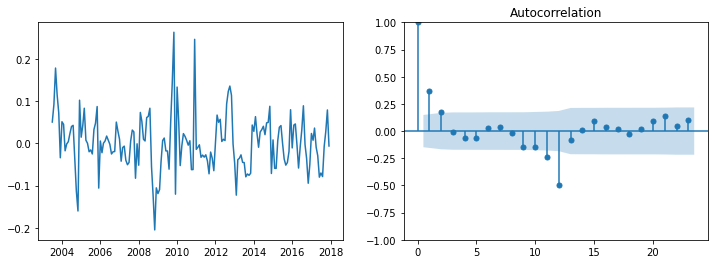

In [371]:
y_diff_12 = df_train.SumProd.diff(12).dropna()
fig, axes = plt.subplots(1,2,figsize=(12,4))
axes[0].plot(y_diff_12)
plot_acf(y_diff_12, ax=axes[1])
print('p-value: ', adfuller(y_diff_12)[1])

p-value:  4.296752726900336e-09


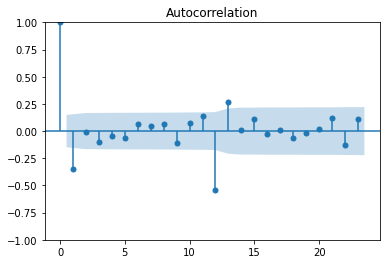

In [372]:
plot_acf(y_diff_12.diff(1).dropna());
print('p-value: ', adfuller(y_diff_12.diff(1).dropna())[1])

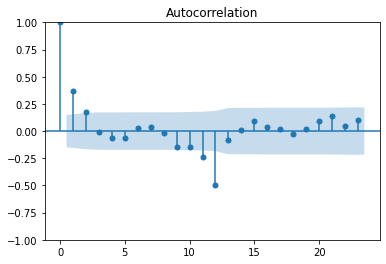

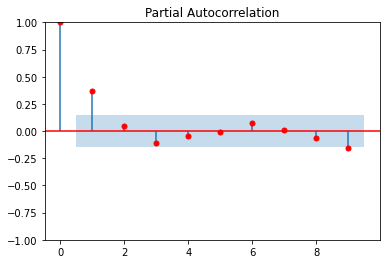

In [373]:
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(y_diff_12);
plot_pacf(y_diff_12, lags=np.arange(10), method='ywm',c='red');

In [374]:
import pmdarima as pm

In [375]:
model = pm.auto_arima(df_train['SumProd'],
                      m=12, # frequency of series. Important to choose manually
                      seasonal=True,
                      stepwise=True,  # only check most interesting combination. False will take way longer.
                      start_p=0, max_p=2,
                      start_d=0, max_d=1,
                      start_q=0, max_q=2,
                      start_P=0, max_P=2,
                      start_D=0, max_D=2,
                      start_Q=0, max_Q=2,
                      njobs=-1, trace=True, error_action='ignore',  suppress_warnings=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-272.676, Time=0.05 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=-514.704, Time=1.63 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-448.277, Time=0.89 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=171.724, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=-439.159, Time=0.09 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=inf, Time=3.44 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=-604.235, Time=1.98 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=-479.975, Time=0.66 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=-606.378, Time=3.21 sec
 ARIMA(1,0,0)(2,0,2)[12] intercept   : AIC=-599.059, Time=4.35 sec
 ARIMA(1,0,0)(1,0,2)[12] intercept   : AIC=-604.773, Time=3.57 sec
 ARIMA(0,0,0)(2,0,1)[12] intercept   : AIC=-556.108, Time=2.52 sec
 ARIMA(2,0,0)(2,0,1)[12] intercept   : AIC=-608.789, Time=3.69 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=-597.790, Time=1.70 sec
 ARIMA(2,0,0)(2,0,0)[12] 

In [380]:
n_periods = len(df_test)
central, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_y_test = df_test.index #pd.date_range(df_test.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
central = pd.Series(central, index=index_y_test)
lower = pd.Series(confint[:, 0], index=index_y_test)
upper = pd.Series(confint[:, 1], index=index_y_test)

In [385]:
central

date
2016-01-01    0.435561
2016-02-01    0.401032
2016-03-01    0.309916
2016-04-01    0.235660
2016-05-01    0.222048
                ...   
2021-02-01    0.405058
2021-03-01    0.321006
2021-04-01    0.235599
2021-05-01    0.214652
2021-12-01    0.220197
Length: 66, dtype: float64

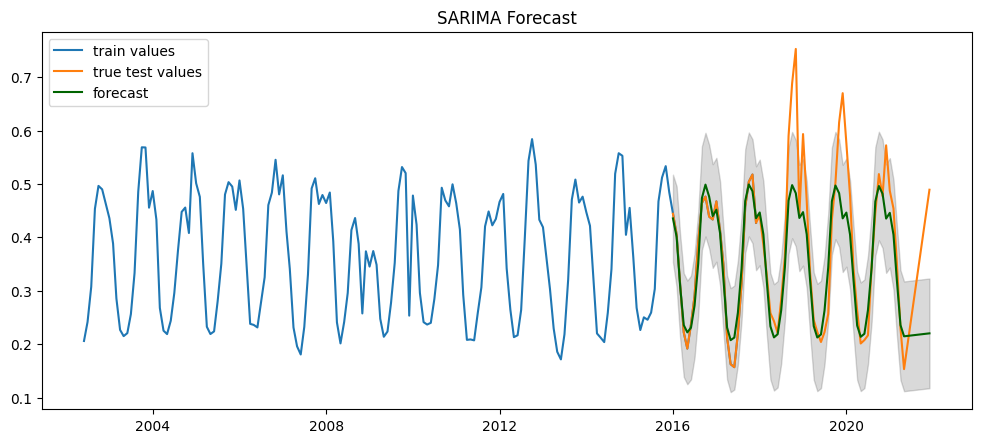

In [386]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(df_train['SumProd'], label = "train values")
plt.plot(df_test['SumProd'], label = "true test values")
plt.plot(central, color='darkgreen',label = "forecast")
plt.fill_between(lower.index, 
                 lower, 
                 upper, 
                 color='k', alpha=.15)

plt.title("SARIMA Forecast")
plt.legend()
plt.show()

In [422]:
df_full = pd.read_csv('../raw_data/dataset_completo_vieytes_8d.csv')
df_full

,date,rad,temp_2m,temp_sup,hum_arriba,hum_raiz,precip,prod,ENSOIndex,ENSOType
0,2002-02-18,958.56,22.49375,23.45875,0.62250,0.64875,7.25,0.0426,0.0,...
1,2002-02-26,965.92,21.99875,22.64125,0.63500,0.64625,41.87,0.0351,0.0,...
2,2002-03-06,855.55,21.34375,21.66250,0.70500,0.70000,61.60,0.0349,0.1,...
3,2002-03-14,634.57,22.62125,22.67875,0.78750,0.75625,90.29,0.0327,0.1,...
4,2002-03-22,570.64,20.34500,20.44250,0.88875,0.86625,109.08,0.0007,0.1,...
...,...,...,...,...,...,...,...,...,...,...
930,2022-05-09,NaN,NaN,NaN,NaN,NaN,NaN,0.0214,0.0,ML ...
931,2022-05-17,NaN,NaN,NaN,NaN,NaN,NaN,0.0175,0.0,ML ...
932,2022-05-25,NaN,NaN,NaN,NaN,NaN,NaN,0.0146,0.0,ML ...
933,2022-06-02,NaN,NaN,NaN,NaN,NaN,NaN,0.0117,0.0,ML ...


In [424]:
df_full.drop(df_full[df_full["date"].str.contains('2002')].index, inplace=True) 
df_full.drop(df_full[df_full["date"].str.contains('2022')].index, inplace=True) 
df_full

,date,rad,temp_2m,temp_sup,hum_arriba,hum_raiz,precip,prod,ENSOIndex,ENSOType
40,2003-01-01,918.13,21.64125,22.49750,0.67750,0.68125,40.16,0.0405,0.9,ME ...
41,2003-01-09,1222.48,23.36250,24.25250,0.63625,0.66250,20.13,0.0330,0.9,ME ...
42,2003-01-17,1065.18,25.41500,26.33625,0.61375,0.64000,13.22,0.0342,0.9,ME ...
43,2003-01-25,1109.98,23.59125,24.48500,0.59625,0.62500,4.97,0.0257,0.9,ME ...
44,2003-02-02,825.05,27.31000,27.87875,0.59625,0.63375,54.37,0.0366,0.6,ME ...
...,...,...,...,...,...,...,...,...,...,...
909,2021-11-25,-7992.00,28.68875,29.90625,0.36500,0.59375,18.49,0.0468,-1.0,ML ...
910,2021-12-03,-7992.00,24.23875,24.84125,0.69500,0.68000,77.18,0.0334,-1.0,ML ...
911,2021-12-11,-7992.00,22.12625,23.01875,0.68000,0.69250,24.43,0.0351,-1.0,ML ...
912,2021-12-19,906.43,20.83750,21.78250,0.67750,0.68500,40.22,0.0234,-1.0,ML ...


In [425]:
df_full = df_full.drop(['ENSOType'], axis=1)
df_full

,date,rad,temp_2m,temp_sup,hum_arriba,hum_raiz,precip,prod,ENSOIndex
40,2003-01-01,918.13,21.64125,22.49750,0.67750,0.68125,40.16,0.0405,0.9
41,2003-01-09,1222.48,23.36250,24.25250,0.63625,0.66250,20.13,0.0330,0.9
42,2003-01-17,1065.18,25.41500,26.33625,0.61375,0.64000,13.22,0.0342,0.9
43,2003-01-25,1109.98,23.59125,24.48500,0.59625,0.62500,4.97,0.0257,0.9
44,2003-02-02,825.05,27.31000,27.87875,0.59625,0.63375,54.37,0.0366,0.6
...,...,...,...,...,...,...,...,...,...
909,2021-11-25,-7992.00,28.68875,29.90625,0.36500,0.59375,18.49,0.0468,-1.0
910,2021-12-03,-7992.00,24.23875,24.84125,0.69500,0.68000,77.18,0.0334,-1.0
911,2021-12-11,-7992.00,22.12625,23.01875,0.68000,0.69250,24.43,0.0351,-1.0
912,2021-12-19,906.43,20.83750,21.78250,0.67750,0.68500,40.22,0.0234,-1.0


In [427]:
df_full = df_full.set_index('date')

KeyError: "None of ['date'] are in the columns"

In [428]:
df_full

,rad,temp_2m,temp_sup,hum_arriba,hum_raiz,precip,prod,ENSOIndex
date,,,,,,,,
2003-01-01,918.13,21.64125,22.49750,0.67750,0.68125,40.16,0.0405,0.9
2003-01-09,1222.48,23.36250,24.25250,0.63625,0.66250,20.13,0.0330,0.9
2003-01-17,1065.18,25.41500,26.33625,0.61375,0.64000,13.22,0.0342,0.9
2003-01-25,1109.98,23.59125,24.48500,0.59625,0.62500,4.97,0.0257,0.9
2003-02-02,825.05,27.31000,27.87875,0.59625,0.63375,54.37,0.0366,0.6
...,...,...,...,...,...,...,...,...
2021-11-25,-7992.00,28.68875,29.90625,0.36500,0.59375,18.49,0.0468,-1.0
2021-12-03,-7992.00,24.23875,24.84125,0.69500,0.68000,77.18,0.0334,-1.0
2021-12-11,-7992.00,22.12625,23.01875,0.68000,0.69250,24.43,0.0351,-1.0


In [429]:
df_full.describe()

,rad,temp_2m,temp_sup,hum_arriba,hum_raiz,precip,prod,ENSOIndex
count,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000
mean,671.353192,16.222243,16.505820,0.732576,0.740100,22.966270,0.035771,-0.003318
std,589.433379,5.503811,5.903967,0.105193,0.086389,24.832355,0.015877,0.792202
min,-7992.000000,4.148750,4.532500,0.237500,0.590000,0.000000,0.002200,-1.700000
25%,420.607500,11.536250,11.313750,0.652500,0.671562,4.552500,0.022200,-0.500000
50%,690.305000,16.101875,16.231875,0.736250,0.728750,15.460000,0.034200,0.000000
75%,966.455000,21.253125,21.853125,0.815000,0.801250,32.612500,0.047600,0.400000
max,1285.070000,28.688750,29.906250,0.937500,0.975000,149.210000,0.088400,2.600000


In [448]:
plt.plot(df_full["date"],df_full["prod"])
plt.show()

KeyError: 'date'

In [437]:
df_train = df_full[:'2017']
df_test = df_full['2016':]
print(df_train.shape)
print(df_test.shape)

(644, 8)
(276, 8)


In [438]:
df_train

,rad,temp_2m,temp_sup,hum_arriba,hum_raiz,precip,prod,ENSOIndex
date,,,,,,,,
2003-01-01,918.13,21.64125,22.49750,0.67750,0.68125,40.16,0.0405,0.9
2003-01-09,1222.48,23.36250,24.25250,0.63625,0.66250,20.13,0.0330,0.9
2003-01-17,1065.18,25.41500,26.33625,0.61375,0.64000,13.22,0.0342,0.9
2003-01-25,1109.98,23.59125,24.48500,0.59625,0.62500,4.97,0.0257,0.9
2003-02-02,825.05,27.31000,27.87875,0.59625,0.63375,54.37,0.0366,0.6
...,...,...,...,...,...,...,...,...
2016-11-24,1165.08,24.24500,24.86125,0.66625,0.68000,46.67,0.0536,-0.7
2016-12-02,1045.41,23.21000,23.79125,0.68125,0.68000,61.34,0.0491,-0.6
2016-12-10,1094.63,23.65750,24.29250,0.64750,0.67375,12.66,0.0432,-0.6


In [439]:
from statsmodels.tsa.stattools import adfuller
print('p-value: ', adfuller(df_full["prod"])[1])

p-value:  1.4142120559118858e-17


In [452]:
df_train['prod']

date
2003-01-01    0.0405
2003-01-09    0.0330
2003-01-17    0.0342
2003-01-25    0.0257
2003-02-02    0.0366
               ...  
2016-11-24    0.0536
2016-12-02    0.0491
2016-12-10    0.0432
2016-12-18    0.0332
2016-12-26    0.0282
Name: prod, Length: 644, dtype: float64

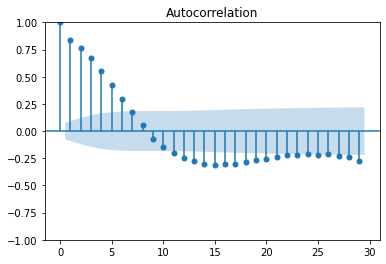

In [446]:
y = df_train['prod']
#from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(y);

p-value:  9.677232414198197e-10


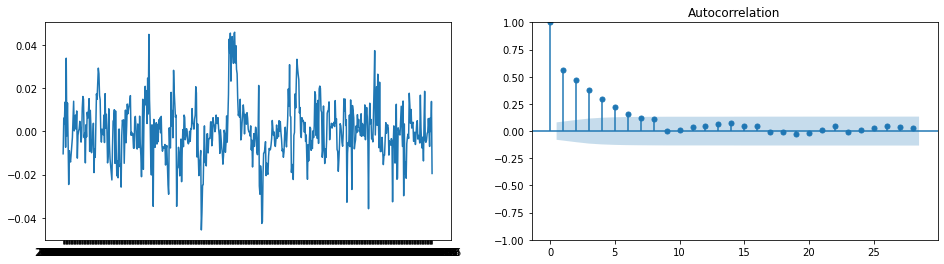

In [455]:
y_diff_45 = df_train['prod'].diff(45).dropna()
fig, axes = plt.subplots(1,2,figsize=(16,4))
axes[0].plot(y_diff_45)
plot_acf(y_diff_45, ax=axes[1])
print('p-value: ', adfuller(y_diff_45)[1])

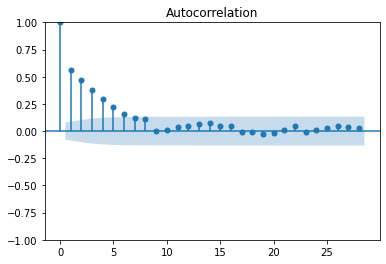

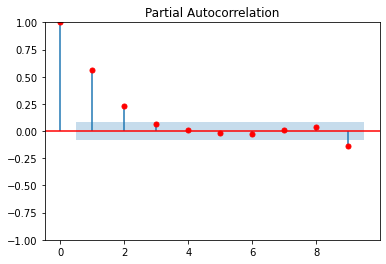

In [456]:
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(y_diff_45);
plot_pacf(y_diff_45, lags=np.arange(10), method='ywm',c='red');

In [457]:
model = pm.auto_arima(df_train['prod'],
                      m=45, # frequency of series. Important to choose manually
                      seasonal=True,
                      stepwise=True,  # only check most interesting combination. False will take way longer.
                      start_p=0, max_p=2,
                      start_d=0, max_d=1,
                      start_q=0, max_q=2,
                      start_P=0, max_P=2,
                      start_D=0, max_D=2,
                      start_Q=0, max_Q=2,
                      njobs=-1, trace=True, error_action='ignore',  suppress_warnings=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[45] intercept   : AIC=-3514.685, Time=0.14 sec
 ARIMA(1,0,0)(1,0,0)[45] intercept   : AIC=-4308.649, Time=23.15 sec
 ARIMA(0,0,1)(0,0,1)[45] intercept   : AIC=-3984.777, Time=14.06 sec
 ARIMA(0,0,0)(0,0,0)[45]             : AIC=-2365.103, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[45] intercept   : AIC=-4302.338, Time=0.13 sec
 ARIMA(1,0,0)(2,0,0)[45] intercept   : AIC=inf, Time=130.07 sec
 ARIMA(1,0,0)(1,0,1)[45] intercept   : AIC=inf, Time=7.87 sec
 ARIMA(1,0,0)(0,0,1)[45] intercept   : AIC=-4306.568, Time=8.17 sec
 ARIMA(1,0,0)(2,0,1)[45] intercept   : AIC=inf, Time=82.01 sec
 ARIMA(0,0,0)(1,0,0)[45] intercept   : AIC=inf, Time=13.38 sec
 ARIMA(2,0,0)(1,0,0)[45] intercept   : AIC=-4168.464, Time=20.93 sec
 ARIMA(1,0,1)(1,0,0)[45] intercept   : AIC=-4311.103, Time=19.63 sec
 ARIMA(1,0,1)(0,0,0)[45] intercept   : AIC=-4321.398, Time=0.20 sec
 ARIMA(1,0,1)(0,0,1)[45] intercept   : AIC=-4331.285, Time=6.91 sec
 ARIMA(1,0,1)(1,0,1)[

In [458]:
n_periods = len(df_test)
central, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_y_test = df_test.index #pd.date_range(df_test.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
central = pd.Series(central, index=index_y_test)
lower = pd.Series(confint[:, 0], index=index_y_test)
upper = pd.Series(confint[:, 1], index=index_y_test)

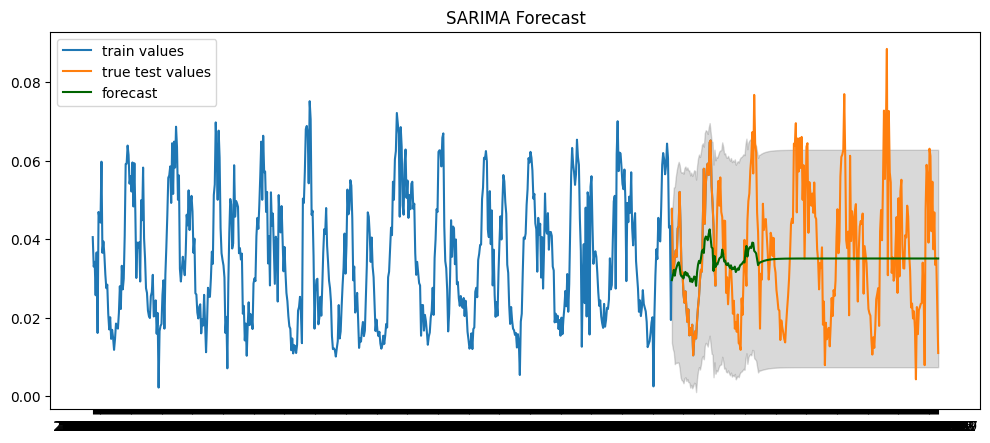

In [459]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(df_train['prod'], label = "train values")
plt.plot(df_test['prod'], label = "true test values")
plt.plot(central, color='darkgreen',label = "forecast")
plt.fill_between(lower.index, 
                 lower, 
                 upper, 
                 color='k', alpha=.15)

plt.title("SARIMA Forecast")
plt.legend()
plt.show()

In [656]:
df_full = pd.read_csv('../raw_data/dataset_completo_vieytes_8d.csv')
df_full = df_full.drop(['ENSOType'], axis=1)
df_full = df_full.drop(['date'], axis=1)
df_full = df_full.dropna()
df_full['Time'] = np.arange(len(df_full.index))
df_full

,rad,temp_2m,temp_sup,hum_arriba,hum_raiz,precip,prod,ENSOIndex,Time
0,958.56,22.493750,23.45875,0.622500,0.648750,7.25,0.0426,0.0,0
1,965.92,21.998750,22.64125,0.635000,0.646250,41.87,0.0351,0.0,1
2,855.55,21.343750,21.66250,0.705000,0.700000,61.60,0.0349,0.1,2
3,634.57,22.621250,22.67875,0.787500,0.756250,90.29,0.0327,0.1,3
4,570.64,20.345000,20.44250,0.888750,0.866250,109.08,0.0007,0.1,4
...,...,...,...,...,...,...,...,...,...
910,-7992.00,24.238750,24.84125,0.695000,0.680000,77.18,0.0334,-1.0,910
911,-7992.00,22.126250,23.01875,0.680000,0.692500,24.43,0.0351,-1.0,911
912,906.43,20.837500,21.78250,0.677500,0.685000,40.22,0.0234,-1.0,912
913,1047.47,21.528750,22.19500,0.633750,0.663750,3.49,0.0110,-1.0,913


In [657]:
df_full['target'] = df_full['prod'].shift(4)
df_full = df_full.dropna()
df_full.head()

,rad,temp_2m,temp_sup,hum_arriba,hum_raiz,precip,prod,ENSOIndex,Time,target
4,570.64,20.34500,20.44250,0.88875,0.86625,109.08,0.0007,0.1,4,0.0426
5,512.04,18.73375,18.76000,0.87000,0.86250,86.29,0.0438,0.1,5,0.0351
6,679.47,17.06375,17.12500,0.88500,0.89375,14.23,0.0258,0.2,6,0.0349
7,451.32,16.70750,16.95875,0.87875,0.88000,15.15,0.0367,0.2,7,0.0327
8,485.88,14.31750,14.43000,0.89500,0.89875,65.17,0.0378,0.2,8,0.0007


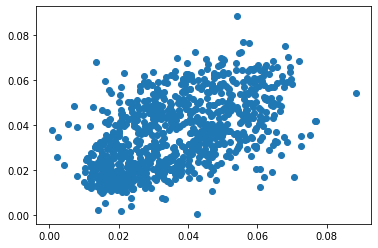

In [658]:
plt.scatter(df_full['target'],df_full['prod'])

In [676]:
from sklearn.linear_model import LinearRegression

train_size = 0.8
index = round(train_size*df_full.shape[0])
df_train = df_full.iloc[:index]
df_test = df_full.iloc[index:]

X_df_train = df_train.drop(['prod','Time'], axis=1)
X_df_test = df_test.drop(['prod','Time'], axis=1)
#X.dropna(inplace=True)  # drop missing values in the feature set
X_df_train.shape

(729, 8)

In [693]:
y_df_train = df_train['target']  # create the target
y_df_test= df_train['target']
#y, X = y.align(X, join='inner')  # drop corresponding values in target
y_df_test.columns = ['prod']

In [694]:
model = LinearRegression()
model.fit(X_df_train, y_df_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [695]:
y_pred = model.predict(X_df_test)

In [696]:
y_pred = pd.DataFrame(y_pred)
y_pred.columns = ['Pred']
y_pred

,Pred
0,0.0172
1,0.0312
2,0.0297
3,0.0490
4,0.0423
...,...
177,0.0420
178,0.0546
179,0.0374
180,0.0468


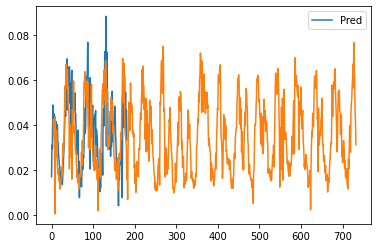

In [698]:
y_pred.plot(y='Pred', use_index=True)
y_df_test.plot(y='prod', use_index=True)
plt.show()

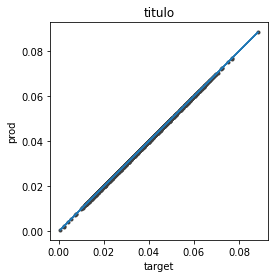

In [664]:
fig, ax = plt.subplots()
ax.plot(X['target'], y, '.', color='0.25')
ax.plot(X['target'], y_pred)
ax.set_aspect('equal')
ax.set_ylabel('prod')
ax.set_xlabel('target')
ax.set_title('titulo');

In [665]:
result = y_pred.join(df_full)

In [666]:
result

,Pred,rad,temp_2m,temp_sup,hum_arriba,hum_raiz,precip,prod,ENSOIndex,Time,target
0,0.0426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0007,570.64,20.34500,20.44250,0.88875,0.86625,109.08,0.0007,0.1,4.0,0.0426
...,...,...,...,...,...,...,...,...,...,...,...
906,0.0420,1240.35,22.72625,24.16375,0.59500,0.62625,0.23,0.0420,-1.0,906.0,0.0556
907,0.0546,1162.29,26.86500,28.08250,0.49500,0.60500,4.85,0.0546,-1.0,907.0,0.0391
908,0.0374,-30.93,24.66875,26.15250,0.46375,0.60000,8.53,0.0374,-1.0,908.0,0.0630
909,0.0468,-7992.00,28.68875,29.90625,0.36500,0.59375,18.49,0.0468,-1.0,909.0,0.0611


<AxesSubplot:xlabel='Time', ylabel='prod'>

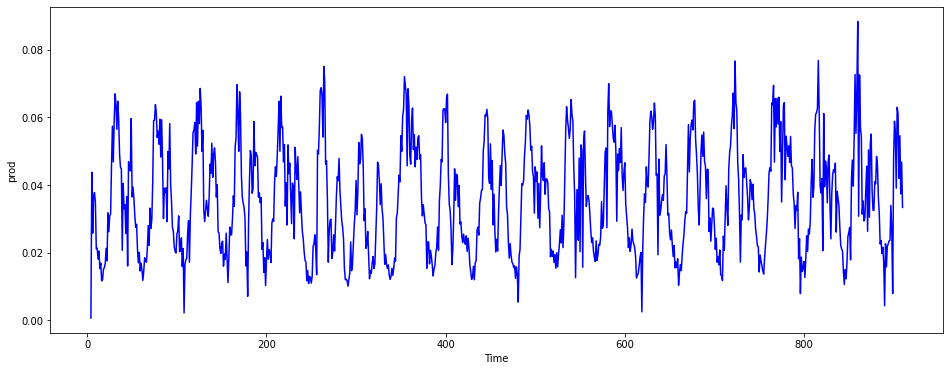

In [654]:
plt.figure(figsize=(16,6))
sns.lineplot(data=result, x="Time", y="prod",color="blue")


<AxesSubplot:xlabel='Time', ylabel='Pred'>

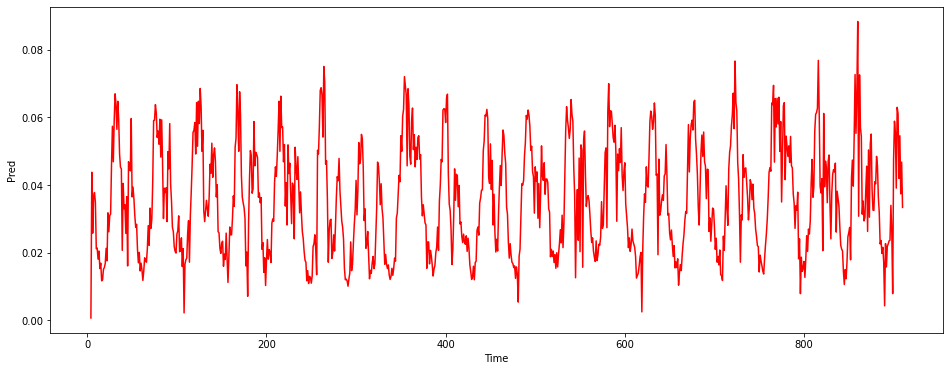

In [655]:
plt.figure(figsize=(16,6))
sns.lineplot(data=result, x="Time", y="Pred",color="red")